# Diffumon
**A Denoising Diffusion Probabilistic Model (DDPM) for Image Generation**

This notebook demonstrates checkpoint loading and sample generation.

In [92]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
# Imports
from diffumon.diffusion.sampler import p_sampler_to_images
from diffumon.utils import get_device, load_unet_checkpoint
import PIL
from PIL.Image import Image as PILImage
from IPython.display import display

from diffumon.metrics.plots import combine_images

In [105]:
device = get_device()

Using device: cuda


In [106]:
# Load Fashion MNIST model
model, noise_schedule, training_summary, chw_dims = load_unet_checkpoint(
    "../checkpoints/fashion_mnist_100_epochs.pth", device=device
)

Loading trained model from ../checkpoints/fashion_mnist_100_epochs.pth...
Model loaded.


In [109]:
# Generate samples
print("Generating samples...")
samples: list[PILImage] = p_sampler_to_images(
    model=model,
    ns=noise_schedule,
    num_samples=48,
    chw_dims=chw_dims,
    seed=1942,
    output_dir=None,
    device=device,
)

Generating samples...


## Show Generated Fashion MNIST samples

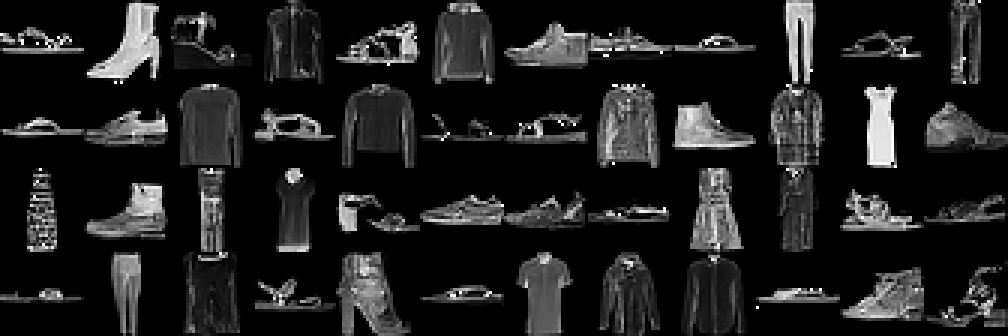

In [110]:
combined = combine_images(samples, rows=4, cols=len(samples) // 4)

scale = 3
combined = combined.resize(
    (combined.width * scale, combined.height * scale), resample=PIL.Image.BOX
)
# Plot the combined image and display
display(combined)